In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
metrics_results = pd.read_csv('metrics.csv')
metrics_results = metrics_results.drop(
    ['metric_name'], axis=1, inplace=False)
metrics_results.sort_values(by='AP_K', ascending=False)

,AP_K,embedder_name,chunk_size
43,0.951905,mistral-embed,2048
41,0.936190,mistral-embed,1024
40,0.936190,mistral-embed,512
42,0.934762,mistral-embed,1536
2,0.899524,intfloat/multilingual-e5-large,1536
1,0.896667,intfloat/multilingual-e5-large,1024
0,0.893333,intfloat/multilingual-e5-large,512
3,0.891905,intfloat/multilingual-e5-large,2048
5,0.890952,intfloat/multilingual-e5-base,1024
8,0.890476,intfloat/multilingual-e5-small,512


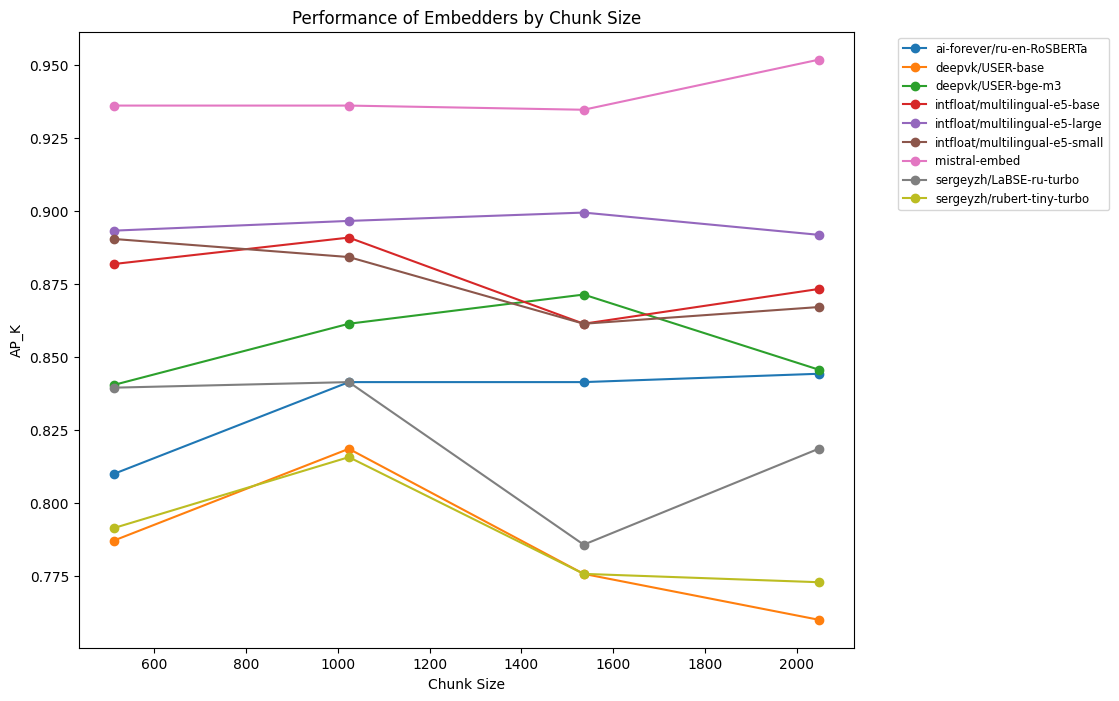

In [8]:
groups = metrics_results.groupby('embedder_name')

fig, ax = plt.subplots(figsize=(10, 8))

bad_names = ['cointegrated/LaBSE-en-ru', 'cointegrated/rubert-tiny2']
# bad_names = []

for name, group in groups:
    if name not in bad_names:
        ax.plot(group['chunk_size'], group['AP_K'], marker='o',
            linestyle='-', label=name)

ax.set_xlabel('Chunk Size')
ax.set_ylabel('AP_K')
ax.set_title('Performance of Embedders by Chunk Size')
ax.legend(fontsize='small', bbox_to_anchor=(1.05, 1))
plt.show()

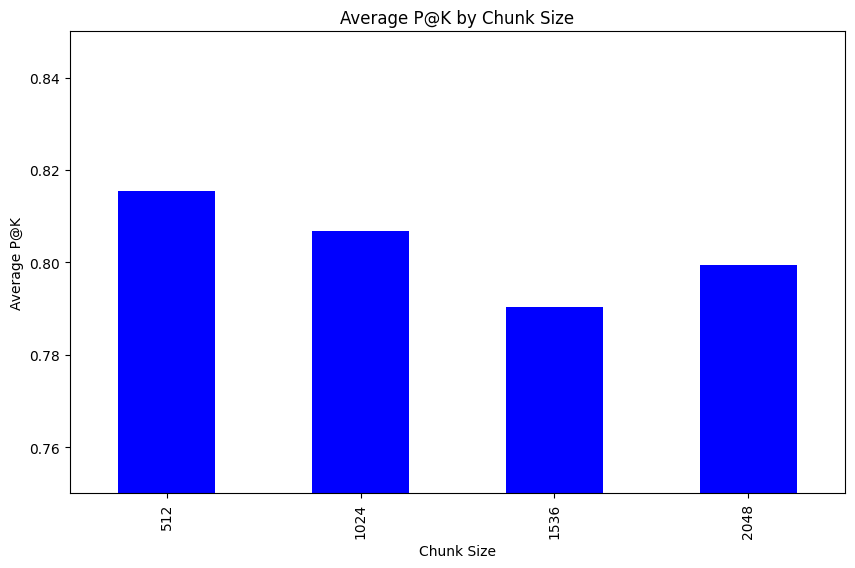

In [9]:
mean_values = metrics_results.groupby('chunk_size')['AP_K'].mean()

mean_values.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Chunk Size')
plt.ylabel('Average P@K')
plt.title('Average P@K by Chunk Size')
plt.ylim(0.75, 0.85)
plt.show()